In [1]:
import keras
import numpy as np
import time
import warnings

from eigenpro import kernels
from eigenpro import mnist
from eigenpro import ciphar
from eigenpro import synthetic
from eigenpro import utils
from eigenpro import training

Using TensorFlow backend.
/home/johannes/seminar/kernel-overfitting/eigenpro/training.py:44: Warning: 

EigenPro-tensorflow has been tested with Keras 2.0.8. If the
current version (2.2.4) fails, switch to 2.0.8 by command,

	pip install Keras==2.0.8


  '\tpip install Keras==2.0.8\n\n' %(keras.__version__), Warning)


In [14]:
### Dataset

dataset_dict = {}

num_classes = 10
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load()
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
dataset_dict['MNIST'] = dataset

# num_classes = 10
# (x_train_full, y_train_full), (x_test_full, y_test_full) = ciphar.load()
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['CIPHAR'] = dataset

# num_classes = 2
# (x_train_full, y_train_full), (x_test_full, y_test_full) = synthetic.load(1)
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['Synthetic1'] = dataset

num_classes = 2
(x_train_full, y_train_full), (x_test_full, y_test_full) = synthetic.load(2)
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
dataset_dict['Synthetic2'] = dataset

Load MNIST dataset.
60000 train samples
10000 test samples
Generated Synthetic2 dataset.
60000 train samples
10000 test samples


In [15]:
### Kernel

kernel_dict = {}

sg = 5
kernel_sgd = lambda x,y: kernels.Gaussian(x, y, sg)
kernel_inv = lambda x,y: training.Gaussian(x, y, sg)
kernel_dict["Gaussian"] = (kernel_sgd, kernel_inv)

sl = 10
kernel_sgd_l = lambda x,y: kernels.Laplace(x, y, sl)
kernel_inv_l = lambda x,y: training.Laplace(x, y, sl)
kernel_dict["Laplace"] = (kernel_sgd_l, kernel_inv_l)



### Size 

size_list = [400]
# size_list = [10000] # or [60000]



### Noise

# noise_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
noise_list = [0, 20, 40, 60, 80, 100]


### Training

trainers = training.training(dataset_dict, kernel_dict, size_list, noise_list)

with open('output/figure5-' + time.strftime("%Y%m%d-%H%M%S") + '.txt', 'w') as f:
    print(trainers, file=f)

D:MNIST K:Gaussian S:400 N:0
SVD time: 0.17, Eigenvalue ratio: 117.43
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 785)               0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 784)               0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 400)               313600    
_________________________________________________________________
trainable (Dense)            (None, 10)                4000      
Total params: 317,600
Trainable params: 4,000
Non-trainable params: 313,600
_________________________________________________________________

Stochastic Gradient Descent
train error: 2.00%	test error: 21.00% (1 epochs, 0.55 seconds)
train error: 0.00%	test error: 15.91% (2 epochs, 0.72 seconds)
Zero Train Error

Linear Interpolation


train error: 3.25%	test error: 28.05% (1 epochs, 0.94 seconds)
train error: 0.00%	test error: 22.38% (2 epochs, 1.19 seconds)
Zero Train Error

Linear Interpolation
Classification Error = 0.1498

D:MNIST K:Laplace S:400 N:20
SVD time: 0.28, Eigenvalue ratio: 334.55
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 785)               0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 784)               0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 400)               313600    
_________________________________________________________________
trainable (Dense)            (None, 10)                4000      
Total params: 317,600
Trainable params: 4,000
Non-trainable params: 313,600
________________________________________________________________

train error: 16.50%	test error: 24.78% (1 epochs, 0.46 seconds)
train error: 4.25%	test error: 26.20% (6 epochs, 0.87 seconds)
train error: 0.50%	test error: 27.14% (11 epochs, 1.14 seconds)
train error: 0.00%	test error: 27.79% (13 epochs, 1.26 seconds)
Zero Train Error

Linear Interpolation
Classification Error = 0.3007

D:Synthetic2 K:Gaussian S:400 N:40
SVD time: 0.14, Eigenvalue ratio: 1109.46
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 51)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 50)                0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 400)               20000     
_________________________________________________________________
trainable (Dense)            (None, 2)                 800       
Tota

train error: 13.00%	test error: 32.05% (1 epochs, 0.43 seconds)
train error: 1.00%	test error: 33.55% (6 epochs, 0.75 seconds)
train error: 0.00%	test error: 34.75% (9 epochs, 0.98 seconds)
Zero Train Error

Linear Interpolation
Classification Error = 0.3568

D:Synthetic2 K:Laplace S:400 N:60
SVD time: 0.13, Eigenvalue ratio: 764.83
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 51)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 50)                0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 400)               20000     
_________________________________________________________________
trainable (Dense)            (None, 2)                 800       
Total params: 20,800
Trainable params: 800
Non-trainable params: 20,000

In [16]:
# trainers = eval(open('figure5.txt', 'r').read())
# trainers

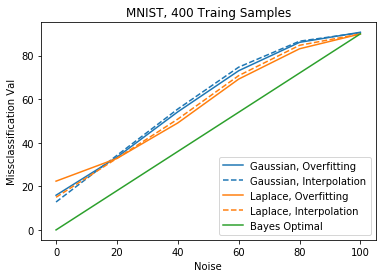

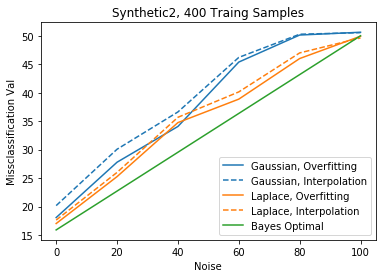

In [21]:
# Noise vs Error

import matplotlib.pyplot as plt
ax = plt.gca()

this_size = size_list[0]

for this_dataset in dataset_dict.keys():
    
    ax.set_prop_cycle(None)

    for this_kernel in kernel_dict.keys():

        inv = []
        sgd = []
        noise = []

        for name, trainer in trainers.items():  

            if trainer['dataset'] != this_dataset:
                continue

            if trainer['size'] != this_size:
                continue

            if trainer['kernel'] != this_kernel:
                continue

            sgd.append(trainer['sgd_ce'] * 100)
            inv.append(trainer['inv_ce'] * 100)
            noise.append(trainer['noise'])

        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(noise, sgd, label=this_kernel + ', Overfitting', color=color) 
        plt.plot(noise, inv, '--', label=this_kernel + ', Interpolation', color=color)    
        
    
    color = next(ax._get_lines.prop_cycler)['color']
    if this_dataset is 'Synthetic2':
        bayes = [15.9 + (50 - 15.9) * p / 100 for p in noise_list]
        plt.plot(noise_list, bayes, label='Bayes Optimal', color=color)
    elif this_dataset is 'MNIST':
        bayes = [(90) * p / 100 for p in noise_list]
        plt.plot(noise_list, bayes, label='Bayes Optimal', color=color)

    plt.title(this_dataset + ', ' + str(this_size) + ' Traing Samples')
    plt.xlabel('Noise')
    plt.ylabel('Missclassification Val')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
# del trainers